In [1]:
from datetime import datetime
import pandas as pd
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df=pd.read_csv('132543.txt')

In [3]:
vals={'Albumin':[],'ALP':[],'ALT':[],'AST':[],'Bilirubin':[],'BUN':[],'Cholesterol':[],'Creatinine':[],'DiasABP':[],'FiO2':[],'GCS':[],'Glucose':[],'HCO3':[],'HCT':[],'HR':[],'K':[],'Lactate':[],'Mg':[],'MAP':[],'MechVent':[],'Na':[],'NIDiasABP':[],'NIMAP':[],'NISysABP':[],'PaCO2':[],'PaO2':[],'pH':[],'Platelets':[],'RespRate':[],'SaO2':[],'SysABP':[],'Temp':[],'TroponinT':[],'Urine':[],'WBC':[],'Weight':[],'Age':[],'Gender':[],'Height':[],'ICUType':[]}

In [4]:
for row in df.iterrows():
    #if row['Parameter']=='HR':
        #arrt.append(row['Time'])
    if row[0]!=0:
        #print(str(row[1]['Parameter']))
    #print("\n")
    #if vals[str(row[1]['Parameter'])]!='RecordID':
        vals[row[1]['Parameter']].append(row[1]['Value'])
    

In [5]:
vals

{'ALP': [105.0],
 'ALT': [12.0],
 'AST': [15.0],
 'Age': [68.0],
 'Albumin': [4.4],
 'BUN': [23.0, 20.0, 10.0],
 'Bilirubin': [0.2],
 'Cholesterol': [],
 'Creatinine': [0.9, 0.7, 0.7],
 'DiasABP': [],
 'FiO2': [],
 'GCS': [15.0,
  15.0,
  14.0,
  15.0,
  15.0,
  15.0,
  15.0,
  15.0,
  15.0,
  15.0,
  15.0,
  15.0,
  15.0,
  15.0,
  15.0,
  15.0,
  15.0,
  15.0],
 'Gender': [1.0],
 'Glucose': [129.0, 106.0, 117.0],
 'HCO3': [28.0, 27.0, 28.0],
 'HCT': [41.3, 37.8, 36.8, 36.1, 37.6, 36.2, 36.3],
 'HR': [79.0,
  76.0,
  74.0,
  75.0,
  75.0,
  88.0,
  78.0,
  86.0,
  83.0,
  78.0,
  83.0,
  76.0,
  77.0,
  73.0,
  73.0,
  74.0,
  72.0,
  61.0,
  64.0,
  57.0,
  60.0,
  61.0,
  62.0,
  61.0,
  69.0,
  67.0,
  76.0,
  74.0,
  74.0,
  76.0,
  75.0,
  75.0,
  77.0,
  77.0,
  68.0,
  62.0,
  67.0,
  62.0,
  74.0,
  61.0,
  63.0,
  58.0,
  66.0,
  58.0,
  65.0,
  59.0,
  57.0,
  68.0,
  71.0,
  69.0,
  62.0,
  69.0,
  77.0,
  76.0,
  74.0,
  79.0,
  76.0,
  78.0,
  75.0,
  79.0],
 'Height': [1

In [6]:
delta={}
for i in vals:
    #print(i)
    if len(vals[i])>1:
        tot=0
        for j in range(len(vals[i])-1):
            #print(j)
            d=abs(vals[i][j+1]-vals[i][j])
            if d!=0 and vals[i][j]!=0:
                tot=tot+d/vals[i][j]
                delta[i]=tot
            elif d!=0 and vals[i][j+1]!=0:
                tot=tot+d/vals[i][j+1]
                delta[i]=tot
            else:
                delta[i]=0
    else:
        delta[i]=0

In [7]:
delta

{'ALP': 0,
 'ALT': 0,
 'AST': 0,
 'Age': 0,
 'Albumin': 0,
 'BUN': 0.6304347826086957,
 'Bilirubin': 0,
 'Cholesterol': 0,
 'Creatinine': 0,
 'DiasABP': 0,
 'FiO2': 0,
 'GCS': 0,
 'Gender': 0,
 'Glucose': 0.28206815854907125,
 'HCO3': 0.07275132275132275,
 'HCT': 0.21177024832713948,
 'HR': 3.82384123456983,
 'Height': 0,
 'ICUType': 0,
 'K': 0.14523809523809536,
 'Lactate': 0,
 'MAP': 0,
 'MechVent': 0,
 'Mg': 0.09523809523809532,
 'NIDiasABP': 5.635603764269312,
 'NIMAP': 3.958333413098728,
 'NISysABP': 4.209976803809308,
 'Na': 0.03551165146909828,
 'PaCO2': 0,
 'PaO2': 0,
 'Platelets': 0.29278609994722526,
 'RespRate': 15.271972540703185,
 'SaO2': 0,
 'SysABP': 0,
 'Temp': 0.2031213295043787,
 'TroponinT': 0,
 'Urine': 7.05993080993081,
 'WBC': 0.33705533596837944,
 'Weight': 0,
 'pH': 0}

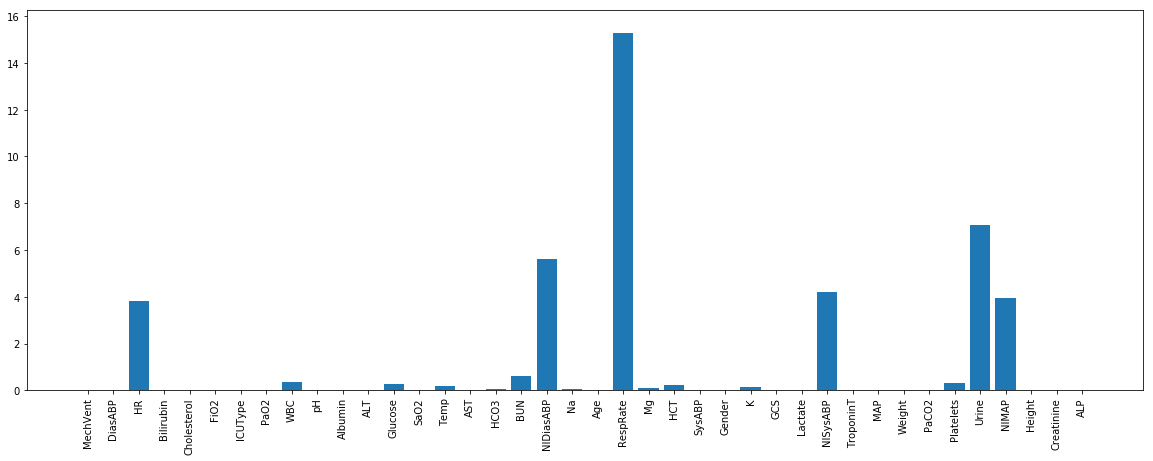

In [8]:
d=delta
X = np.arange(len(d))
fog=plt.figure(figsize=(20,7))
plt.bar(X, d.values(), align='center', figure=fog)
plt.xticks(X, d.keys(),rotation='vertical')
ymax = max(d.values()) + 1
plt.ylim(0, ymax)
plt.show()